In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('eurostat/Wastewater_generation_and_discharge_by_RBD.csv')
df.drop("Flag and Footnotes", axis = 1, inplace = True)

df = df.drop(df.index[(df.SUBSTANCE == "Volume") & (df.UNIT == "Tonnes of O2 per day")])
df.SUBSTANCE.unique()

array(['Volume', 'Biochemical oxygen demand (BOD)', 'Nitrogen (N-tot )'],
      dtype=object)

In [2]:
df.head()

,TIME,RBD,WW_GTD,SUBSTANCE,UNIT,Value
0,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Volume,Tonnes per day,:
2,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Volume,Million cubic metres,58.58
3,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Tonnes per day,:
4,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Tonnes of O2 per day,57.78
5,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Million cubic metres,:


In [3]:
df.loc[df.Value == ':', 'Value'] = np.NaN
df = df.dropna()
df.Value = df.Value.astype('float');

In [4]:
df.head()

,TIME,RBD,WW_GTD,SUBSTANCE,UNIT,Value
2,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Volume,Million cubic metres,58.58
4,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Tonnes of O2 per day,57.78
6,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Nitrogen (N-tot ),Tonnes per day,10.59
11,2000,Scheldt/Escaut - RBD (BE-Brussels),"Generation of wastewater - agriculture, forest...",Volume,Million cubic metres,0.00
13,2000,Scheldt/Escaut - RBD (BE-Brussels),"Generation of wastewater - agriculture, forest...",Biochemical oxygen demand (BOD),Tonnes of O2 per day,0.00


In [5]:
df.loc[(df.RBD == 'Scheldt/Escaut - RBD (BE-Brussels)') & (df.TIME == 2000) & (df.Value != 0), ['SUBSTANCE', 'Value', "UNIT"]]

,SUBSTANCE,Value,UNIT
2,Volume,58.58,Million cubic metres
4,Biochemical oxygen demand (BOD),57.78,Tonnes of O2 per day
6,Nitrogen (N-tot ),10.59,Tonnes per day
56,Volume,5.45,Million cubic metres
58,Biochemical oxygen demand (BOD),5.37,Tonnes of O2 per day
60,Nitrogen (N-tot ),1.00,Tonnes per day
65,Volume,51.96,Million cubic metres
67,Biochemical oxygen demand (BOD),51.25,Tonnes of O2 per day
69,Nitrogen (N-tot ),9.49,Tonnes per day
78,Nitrogen (N-tot ),0.32,Tonnes per day


In [6]:
df.RBD.unique()

array(['Scheldt/Escaut - RBD (BE-Brussels)',
       'Schelde/Escaut - RBD (BE-Flemish region)',
       'Maas/Meuse - RBD (BE-Flemish region)', 'Bulgaria',
       'Danube - RBD (BG)', 'Black Sea - RBD', 'East Aegean - RBD (BG)',
       'West Aegean - RBD (BG)', 'Croatia', 'Latvia',
       'Daugava - RBD (LV)', 'Gauja (Koiva) - RBD (LV)',
       'Lielupe - RBD (LV)', 'Venta - RBD (LV)', 'Malta', 'Malta - RBD',
       'Romania', 'Danube - RBD (RO)', 'Slovenia', 'Danube - RBD (SI)',
       'North Adriatic - RBD', 'Switzerland', 'Rhine - RBD (CH)',
       'Rh�ne - RBD (CH)', 'Po - RBD (CH)', 'Danube - RBD (CH)',
       'Adige - RBD', 'Former Yugoslav Republic of Macedonia, the',
       'Serbia', 'Danube (RS)', 'Sava (RS)', 'Morava (RS)', 'Turkey',
       'Cyprus', 'Cyprus - RBD', 'Minho and Lima - RBD (PT)',
       'Cavado, Ave and Leca - RBD', 'Douro - RBD (PT)',
       'Vouga, Mondego and Lis - RBD',
       'Tagus and Western Basins - RBD (PT)', 'Sado and Mira - RBD',
       'Guadiana - R

In [7]:
df.loc[ (df.SUBSTANCE == 'Volume') & (df.Value != 0)].groupby("RBD").Value.count().sort_values();

Serbien (SR) und Bulgarien (BG) monitorn ihre Wastewater generation am stärksten

In [8]:
dg = df.loc[df.SUBSTANCE == "Volume"].groupby(["TIME", "RBD"]).Value.mean()
dg.head(20)

TIME  RBD                                       
2000  Adige - RBD                                      0.870000
      Black Sea - RBD                                 56.272500
      Bulgaria                                       311.593333
      Croatia                                        374.333333
      Danube (RS)                                     96.894000
      Danube - RBD (BG)                              138.303333
      Danube - RBD (CH)                                8.850000
      Danube - RBD (RO)                             1730.871429
      Danube - RBD (SI)                               44.865000
      Daugava - RBD (LV)                              73.677000
      East Aegean - RBD (BG)                          91.228333
      Former Yugoslav Republic of Macedonia, the     103.733333
      Gauja (Koiva) - RBD (LV)                         8.831000
      Latvia                                         101.777000
      Lielupe - RBD (LV)                               

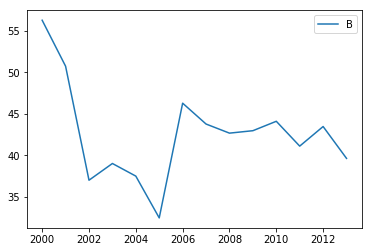

In [11]:
import matplotlib.pyplot as plt

plt.plot(np.arange(2000, 2014),dg[dg.index.get_level_values('RBD') == 'Black Sea - RBD'])
plt.legend('Black Sea - RBD')
plt.show()

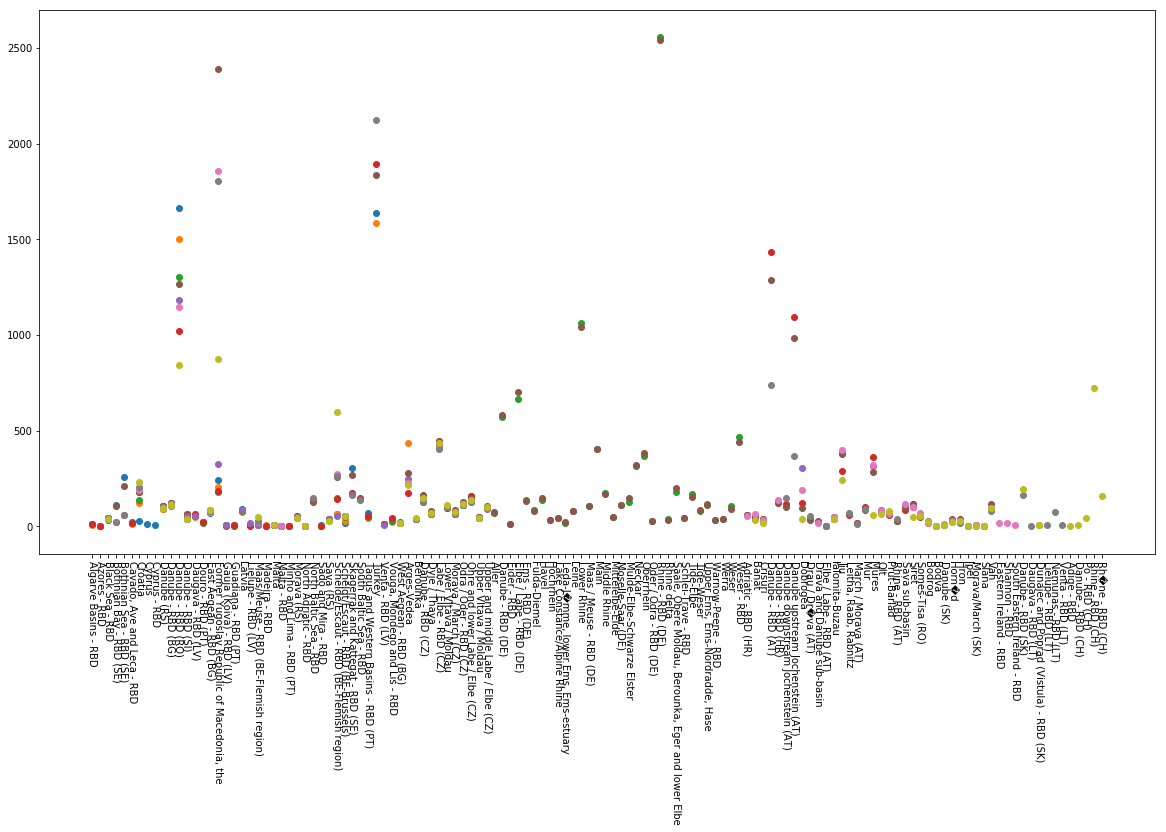

In [12]:
plt.figure(figsize = (20,10))
for i in range(2005, 2014):
    plt.scatter(dg[dg.index.get_level_values('TIME') == i].index.get_level_values('RBD'), dg[dg.index.get_level_values('TIME') == i])
    plt.xticks(rotation=-90)


plt.show()

In [13]:
df.loc[(df.SUBSTANCE != "Volume")].SUBSTANCE.value_counts()

Biochemical oxygen demand (BOD)    3262
Nitrogen (N-tot )                  3145
Name: SUBSTANCE, dtype: int64

In [14]:
df.loc[(df.SUBSTANCE == 'Biochemical oxygen demand (BOD)')].head()

,TIME,RBD,WW_GTD,SUBSTANCE,UNIT,Value
4,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Tonnes of O2 per day,57.78
13,2000,Scheldt/Escaut - RBD (BE-Brussels),"Generation of wastewater - agriculture, forest...",Biochemical oxygen demand (BOD),Tonnes of O2 per day,0.00
31,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - mining and quarrying,Biochemical oxygen demand (BOD),Tonnes of O2 per day,0.00
58,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - services,Biochemical oxygen demand (BOD),Tonnes of O2 per day,5.37
67,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - private households,Biochemical oxygen demand (BOD),Tonnes of O2 per day,51.25


**Biochemical oxygen demand (BOD)** shows the level of poultion of the water, high value -> high poultion

In [15]:
df.loc[(df.SUBSTANCE == 'Nitrogen (N-tot )')].head()

,TIME,RBD,WW_GTD,SUBSTANCE,UNIT,Value
6,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Nitrogen (N-tot ),Tonnes per day,10.59
15,2000,Scheldt/Escaut - RBD (BE-Brussels),"Generation of wastewater - agriculture, forest...",Nitrogen (N-tot ),Tonnes per day,0.00
33,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - mining and quarrying,Nitrogen (N-tot ),Tonnes per day,0.00
60,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - services,Nitrogen (N-tot ),Tonnes per day,1.00
69,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - private households,Nitrogen (N-tot ),Tonnes per day,9.49


Nitrogen shows level of polution.

In [19]:
dh = df.loc[df.SUBSTANCE == 'Nitrogen (N-tot )'].groupby(["TIME", "RBD"]).Value.mean()
dk = df.loc[df.SUBSTANCE == 'Biochemical oxygen demand (BOD)'].groupby(["TIME", "RBD"]).Value.mean()

print(dk.head(20))
print(dh.head(20))
# plt.plot(np.arange(2005, 2014),dg[dg.index.get_level_values('RBD') == 'Black Sea - RBD'])

TIME  RBD                                     
2000  Danube - RBD (RO)                           49.285714
      Danube - RBD (SI)                           21.777500
      Daugava - RBD (LV)                           1.742000
      Gauja (Koiva) - RBD (LV)                     0.435000
      Latvia                                       2.854000
      Lielupe - RBD (LV)                           0.379000
      Maas/Meuse - RBD (BE-Flemish region)         1.255000
      Malta                                        0.000000
      Malta - RBD                                  0.000000
      North Adriatic - RBD                         1.257500
      Romania                                     49.285714
      Schelde/Escaut - RBD (BE-Flemish region)    20.012500
      Scheldt/Escaut - RBD (BE-Brussels)          24.216667
      Slovenia                                    23.035000
      Venta - RBD (LV)                             0.298000
2001  Danube - RBD (RO)                           44.

In [20]:
w = dk[dk.index.get_level_values('RBD') == 'Elbe / Labe - RBD (DE)']
v = dh[dh.index.get_level_values('RBD') == 'Lower Rhine']

In [26]:
print(dk[dk.index.get_level_values('RBD') == 'Danube - RBD (RO)'])
print(dh[dh.index.get_level_values('RBD') == 'Danube - RBD (RO)'])

dh[2004,'Danube - RBD (RO)'] = dh[2003,'Danube - RBD (RO)']

TIME  RBD              
2000  Danube - RBD (RO)     49.285714
2001  Danube - RBD (RO)     44.771429
2002  Danube - RBD (RO)     52.228571
2003  Danube - RBD (RO)     65.633333
2005  Danube - RBD (RO)    127.728571
2006  Danube - RBD (RO)    254.275000
2007  Danube - RBD (RO)    264.457143
2008  Danube - RBD (RO)     22.447500
2009  Danube - RBD (RO)     26.558571
2010  Danube - RBD (RO)     29.551429
2011  Danube - RBD (RO)     26.281250
2012  Danube - RBD (RO)     69.462700
2013  Danube - RBD (RO)    114.230909
Name: Value, dtype: float64
TIME  RBD              
2000  Danube - RBD (RO)    17.157143
2001  Danube - RBD (RO)    12.857143
2002  Danube - RBD (RO)    16.542857
2003  Danube - RBD (RO)    18.033333
2005  Danube - RBD (RO)    27.700000
2006  Danube - RBD (RO)    27.066667
2008  Danube - RBD (RO)     8.718750
2009  Danube - RBD (RO)    10.944286
2010  Danube - RBD (RO)    12.257143
2011  Danube - RBD (RO)     1.601250
2012  Danube - RBD (RO)    18.837233
2013  Danube - RBD (RO)

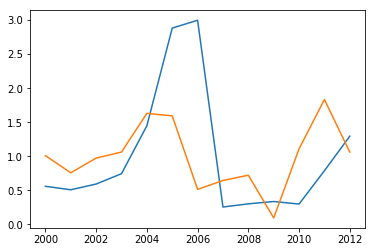

In [29]:
plt.plot(np.arange(2000,2013), dk[dk.index.get_level_values('RBD') == 'Danube - RBD (RO)']/dk[dk.index.get_level_values('RBD') == 'Danube - RBD (RO)'].mean())
plt.plot(np.arange(2000,2013), dh[dh.index.get_level_values('RBD') == 'Danube - RBD (RO)']/dh[dh.index.get_level_values('RBD') == 'Danube - RBD (RO)'].mean())
plt.show()

In [32]:
print(dk[dk.index.get_level_values('RBD').str.contains('Danube')])

TIME  RBD                               
2000  Danube - RBD (RO)                      49.285714
      Danube - RBD (SI)                      21.777500
2001  Danube - RBD (RO)                      44.771429
      Danube - RBD (SI)                      18.142500
2002  Danube - RBD (RO)                      52.228571
      Danube - RBD (SI)                      16.290000
2003  Danube - RBD (RO)                      65.633333
      Danube - RBD (SI)                      16.126250
2004  Danube - RBD (SI)                      13.923750
2005  Danube - RBD (RO)                     127.728571
      Danube - RBD (SI)                      10.186250
2006  Danube - RBD (CZ)                      59.554444
      Danube - RBD (RO)                     254.275000
      Danube - RBD (SI)                       8.951250
2007  Danube - RBD (CZ)                      56.535556
      Danube - RBD (DE)                     940.690000
      Danube - RBD (RO)                     264.457143
      Danube - RBD (SI) 

In [33]:
print(dk[dk.index.get_level_values('RBD').str.contains('Rhine')])

TIME  RBD                        
2007  Lake Constance/Alpine Rhine      68.850000
      Lower Rhine                    1230.950000
      Middle Rhine                    217.810000
      Rhine - RBD (DE)               3463.280000
      Rhine delta                      88.990000
2008  Rhine - RBD (AT)                 15.933333
2010  Lake Constance/Alpine Rhine      71.540000
      Lower Rhine                    1163.790000
      Middle Rhine                    216.670000
      Rhine - RBD (AT)                 18.473750
      Rhine - RBD (DE)               3383.190000
      Rhine delta                      62.580000
2012  Rhine - RBD (AT)                 20.270000
2013  Rhine - RBD (CH)                178.300000
Name: Value, dtype: float64


# ----------------------------------------------

In [19]:
df.loc[(df.SUBSTANCE == "Volume") & (df.UNIT == "Tonnes of O2 per day")].Value.unique()

array([0.])

In [38]:
dg.head()

,UID,versionId,beginLifeSpanVersion,spatialUnitIdentifier,spatialUnitIdentifierScheme,observedProperty,phenomenonTimePeriod,resultObservedVolume,resultObservationStatus,remarks,waterbaseObservationStatus,waterbaseRemarks
0,1,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,AT,countryCode,ABS_GW,1999,1114.91,NaN,NaN,A,NaN
1,2,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,AT,countryCode,ABS_GW_DOM,1999,45.42,NaN,NaN,A,NaN
2,3,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,AT,countryCode,ABS_GW_NACE_A,1999,100.00,NaN,NaN,A,NaN
3,4,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,AT,countryCode,ABS_GW_NACE_A011_A013,1999,67.50,NaN,NaN,A,NaN
4,5,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,AT,countryCode,ABS_GW_NACE_C,1999,348.85,NaN,NaN,A,NaN


In [1]:
import plotly as py
import plotly.graph_objs as go

In [4]:
data = dict (
    type = 'choropleth',
    locations = ['China','Canada','Brazil'],
    locationmode='country names',
    colorscale = [1,2,3],
    z=[10,20,30])

In [5]:
map = go.Figure(data=[data])
py.offline.plot(map)

'file:///home/jens/Dokumente/UniversitatPotsdam/HackhPI/dustycrocodile/temp-plot.html'